In [2]:
# Установка необходимых библиотек
!pip install psycopg2-binary

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import os

# Параметры подключения (берутся из переменных окружения)
DB_USER = os.environ.get('DB_USER', 'postgres')
DB_PASS = os.environ.get('DB_PASS', 'postgres')
DB_HOST = os.environ.get('DB_HOST', 'db')
DB_PORT = os.environ.get('DB_PORT', '5432')
DB_NAME = os.environ.get('DB_NAME', 'analytics_db')

connection_string = f'postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}'
engine = create_engine(connection_string)

In [2]:
# Загрузка данных
query = "SELECT * FROM weather_data ORDER BY timestamp DESC LIMIT 500"
df = pd.read_sql(query, engine)

print(f"Загружено {len(df)} записей")
df.head()

Загружено 11 записей


,id,timestamp,temperature,humidity,pressure,wind_speed
0,11,2026-01-14 12:13:52.470390,31.97,40.89,736.34,28.35
1,10,2026-01-14 12:13:50.463131,-16.55,20.67,731.77,20.50
2,9,2026-01-14 12:13:48.453523,-3.92,62.89,771.61,27.16
3,8,2026-01-14 12:13:46.449193,22.31,3.94,738.92,18.56
4,7,2026-01-14 12:13:44.444237,-29.25,60.27,738.85,23.59


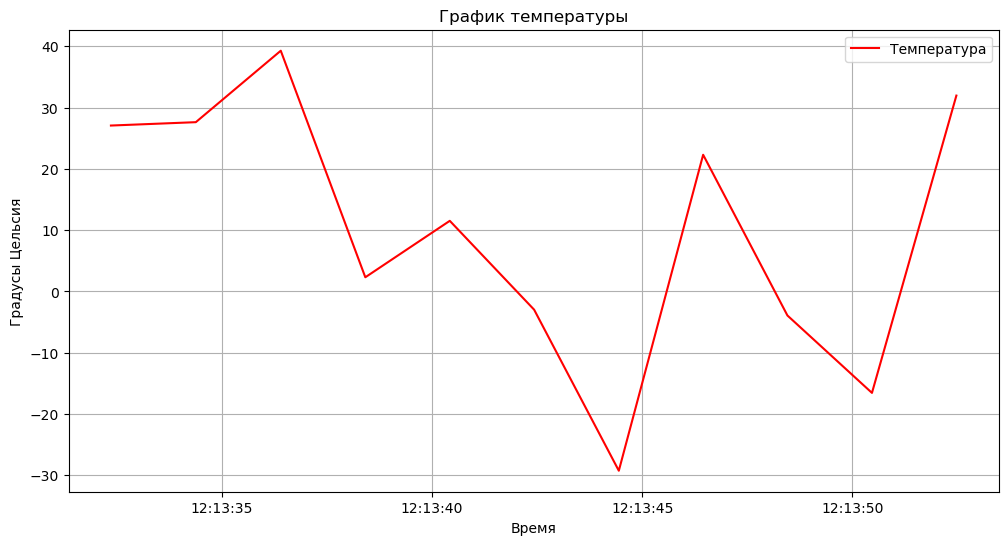

In [3]:
# Визуализация температуры
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['temperature'], label='Температура', color='r')
plt.title('График температуры')
plt.xlabel('Время')
plt.ylabel('Градусы Цельсия')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Корреляция параметров
df[['temperature', 'humidity', 'pressure', 'wind_speed']].corr()

,temperature,humidity,pressure,wind_speed
temperature,1.000000,0.016556,0.119163,0.096512
humidity,0.016556,1.000000,0.573455,-0.302442
pressure,0.119163,0.573455,1.000000,-0.496381
wind_speed,0.096512,-0.302442,-0.496381,1.000000
